## Trys with contours

### Solution 1

Number of Contours found = 2871


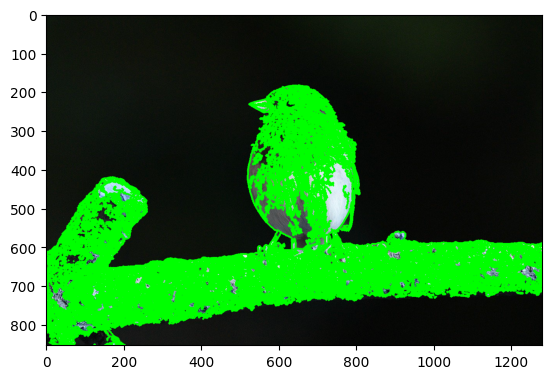

In [2]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt
  
image = cv2.imread('pictures/dark-eyed-junco.jpg') 
#cv2.waitKey(0) 
  
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
  
edged = cv2.Canny(gray, 30, 200) 
#cv2.waitKey(0) 
  
contours, hierarchy = cv2.findContours(edged,  
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 
  
#cv2.waitKey(0) 
  
print("Number of Contours found = " + str(len(contours))) 
  
cv2.drawContours(image, contours, -1, (0, 255, 0), 3) 

# show on screen (optional in jupiter)
%matplotlib inline
plt.imshow(image)
plt.show()

### Solution 2

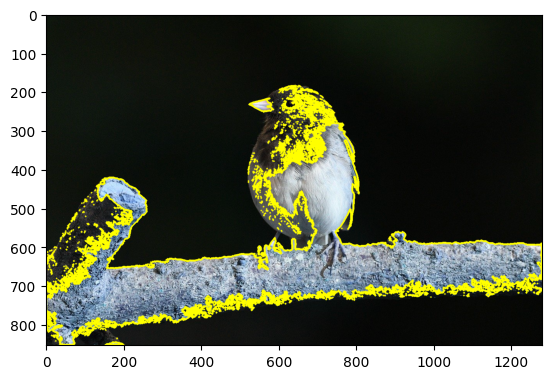

True

In [3]:
import cv2
import numpy as np

image = cv2.imread("pictures/dark-eyed-junco.jpg")

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, binary = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)

contours, hierarchy = cv2.findContours(
    binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
)
drawing = np.zeros((gray.shape[0], gray.shape[1], 3), dtype=np.uint8)
CountersImg = cv2.drawContours(drawing, contours, -1, (255, 255, 0), 3)
ImgWithCounter = cv2.drawContours(image, contours, -1, (255, 255, 0), 3)

# show on screen (optional in jupiter)
%matplotlib inline
plt.imshow(ImgWithCounter)
plt.show()

# save to disk
cv2.imwrite('picture.png', ImgWithCounter)

### Solution 3

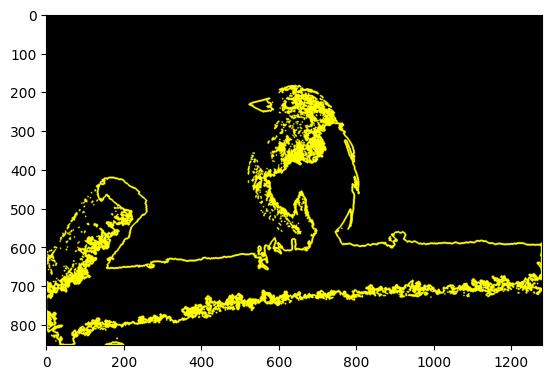

True

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread("pictures/dark-eyed-junco.jpg")

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Assignment of pixel values in relation to the provided threshold
_, binary = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)

contours, hierarchy = cv2.findContours(
    binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
)
drawing = np.zeros((gray.shape[0], gray.shape[1], 3), dtype=np.uint8)
CountersImg = cv2.drawContours(drawing, contours, -1, (255, 255, 0), 3)

# show on screen (optional in jupiter)
%matplotlib inline
plt.imshow(CountersImg)
plt.show()

# save to disk
cv2.imwrite('picture.png', CountersImg)

### Solution 4

In [5]:
CANNY_THRESH_1 = 1
CANNY_THRESH_2 = 500
MASK_COLOR = (0.0,0.0,1.0) # In BGR format

size = (8, 8)
shape = cv2.MORPH_RECT
#kernel = cv2.getStructuringElement(shape, size)
kernel = np.ones((10, 10), np.uint8) 
kernel1 = np.ones((8, 8), np.uint8) 
kernel2 = np.ones((10, 10), np.uint8) 

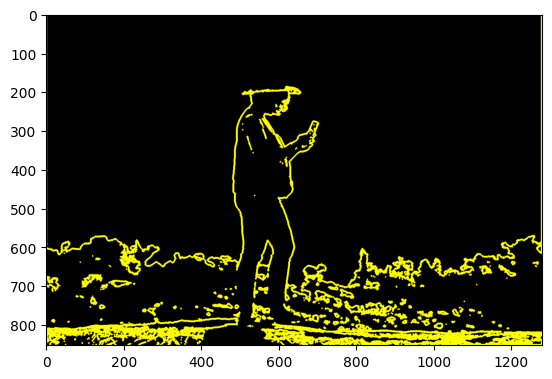

True

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread("pictures/woman.jpg")

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Assignment of pixel values in relation to the provided threshold
_, binary = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)

contours, hierarchy = cv2.findContours(
    binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
)
drawing = np.zeros((gray.shape[0], gray.shape[1], 3), dtype=np.uint8)
CountersImg = cv2.drawContours(drawing, contours, -1, (255, 255, 0), 3)

# show on screen (optional in jupiter)
%matplotlib inline
plt.imshow(CountersImg)
plt.show()

# save to disk
cv2.imwrite('picture.png', CountersImg)

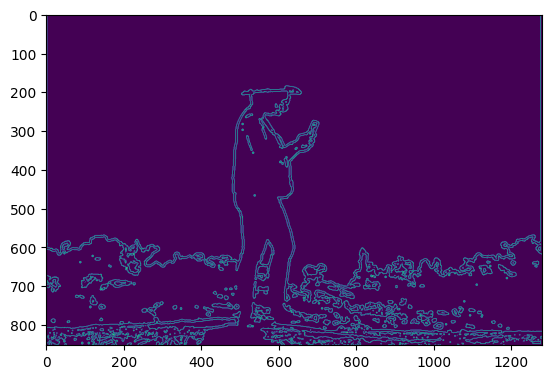

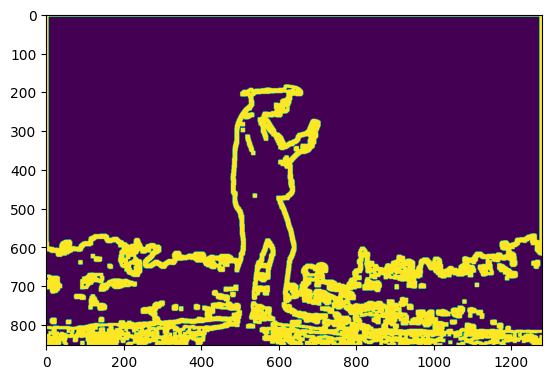

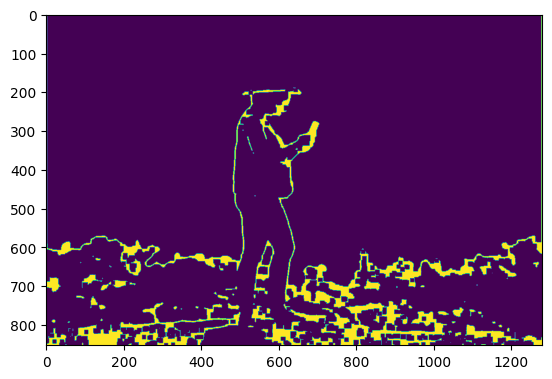

In [7]:
#-- Edge detection -------------------------------------------------------------------
# Edge Detection Algorithm
edges = cv2.Canny(CountersImg, CANNY_THRESH_1, CANNY_THRESH_2)
plt.imshow(edges)
plt.show()
# enlarges the area of the object, highlighting features (existing image is taken)
edges = cv2.dilate(edges, kernel1)
plt.imshow(edges)
plt.show()
# Erode the boundaries of the foreground object
# Used to diminish the characteristics of an image.
edges = cv2.erode(edges, kernel2)
plt.imshow(edges)
plt.show()

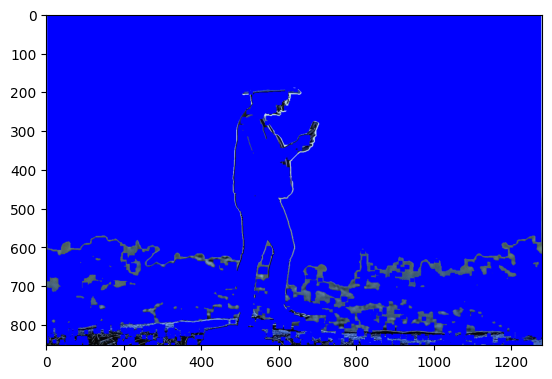

In [8]:
# Stack arrays in the depth sequence (along the third axis).
mask_stack = np.dstack([edges]*3)    # Create 3-channel alpha mask

#-- Blend masked img into MASK_COLOR background --------------------------------------
mask_stack  = mask_stack.astype('float32') / 255.0          # Use float matrices, 
img         = image.astype('float32') / 255.0                 #  for easy blending

masked = (mask_stack * img) + ((1-mask_stack) * MASK_COLOR) # Blend
masked = (masked * 255).astype('uint8')                     # Convert back to 8-bit 
     
plt.imshow(masked)
plt.show()# Display

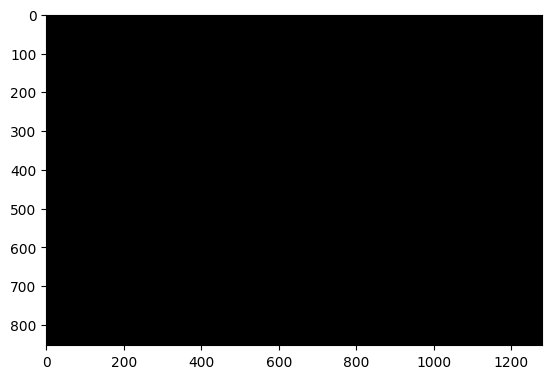

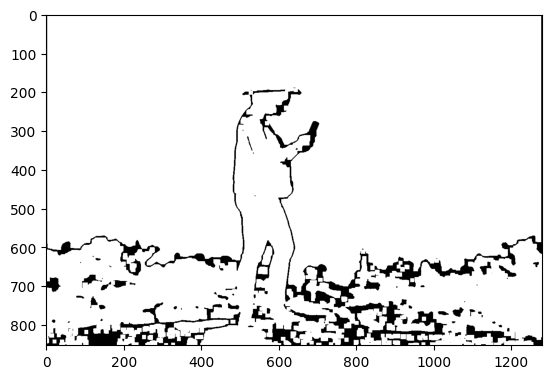

In [9]:
img = img.astype('float32') / 255.0  
# split image into channels
c_red, c_green, c_blue = cv2.split(img)

# merge with mask got on one of a previous steps
img_a = cv2.merge((c_red, c_green, c_blue, edges.astype('float32') / 255.0))
plt.imshow(img)
plt.show()
plt.imshow(img_a)
plt.show()

### Solution 5

In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread("pictures/senior.jpg")
img = cv2.imread("pictures/senior.jpg")

In [11]:
CANNY_THRESH_1 = 1
CANNY_THRESH_2 = 500
MASK_COLOR = (1.0,1.0,1.0) # In BGR format

size = (6, 6)
shape = cv2.MORPH_RECT
#kernel = cv2.getStructuringElement(shape, size)
kernel = np.ones((3, 3), np.uint8) 
kernel1 = np.ones((4, 4), np.uint8) 
kernel2 = np.ones((3, 3), np.uint8) 

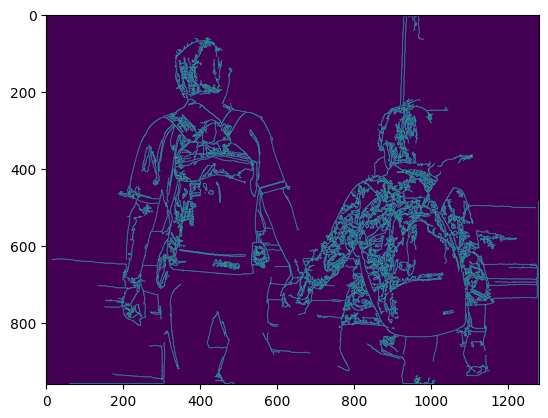

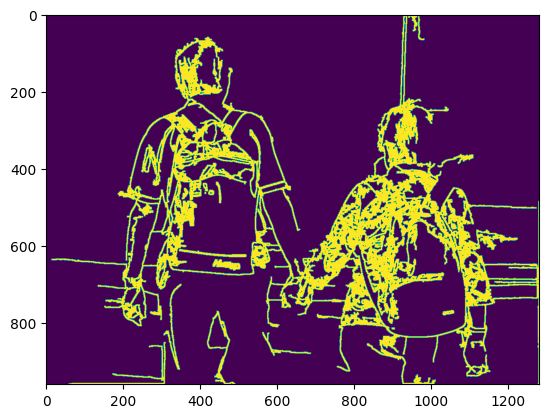

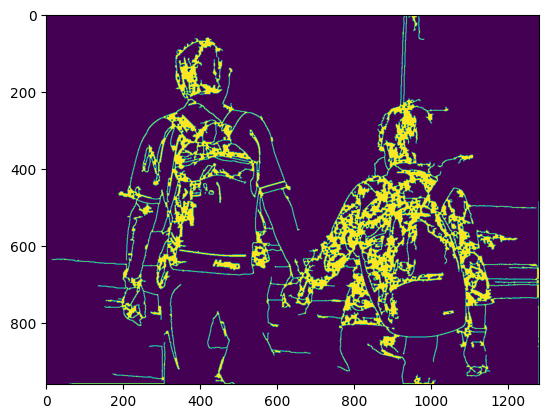

In [12]:
# Color Space Conversion Codes
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

#-- Edge detection -------------------------------------------------------------------
# Edge Detection Algorithm
edges = cv2.Canny(gray, CANNY_THRESH_1, CANNY_THRESH_2)
plt.imshow(edges)
plt.show()
# enlarges the area of the object, highlighting features (existing image is taken)
edges = cv2.dilate(edges, kernel1)
plt.imshow(edges)
plt.show()
# Erode the boundaries of the foreground object
# Used to diminish the characteristics of an image.
edges = cv2.erode(edges, kernel2)

plt.imshow(edges)
plt.show()

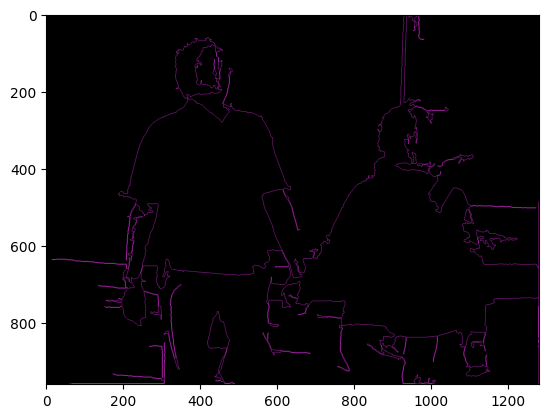

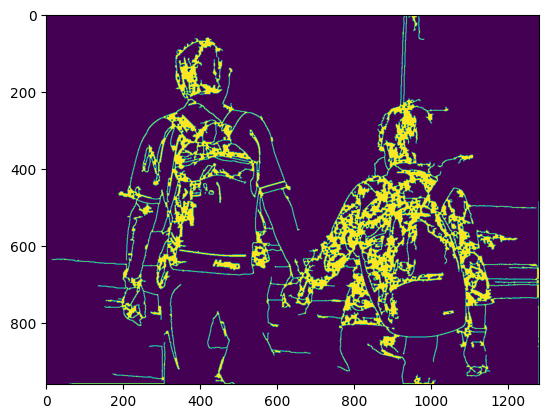

True

In [13]:
# Assignment of pixel values in relation to the provided threshold
#_, binary = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)

contours, hierarchy = cv2.findContours(
    edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
)

# show on screen (optional in jupiter)
%matplotlib inline
contours

drawing = np.zeros((gray.shape[0], gray.shape[1], 3), dtype=np.uint8)
CountersImg = cv2.drawContours(drawing, contours, -1, (212, 44, 213), 1)

# show on screen (optional in jupiter)
%matplotlib inline
plt.imshow(CountersImg)
plt.show()

plt.imshow(edges)
plt.show()


# save to disk
cv2.imwrite('picture.png', CountersImg)

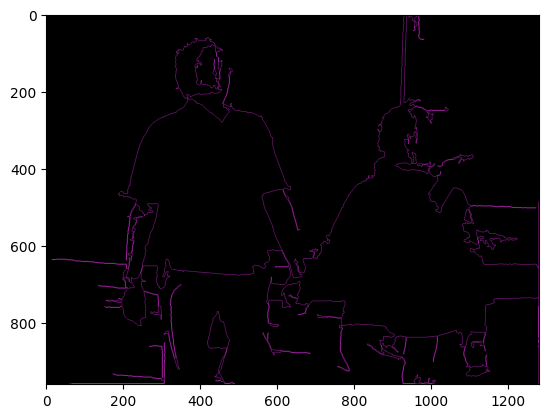

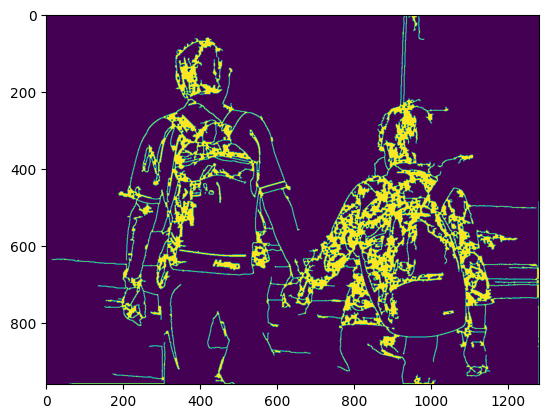

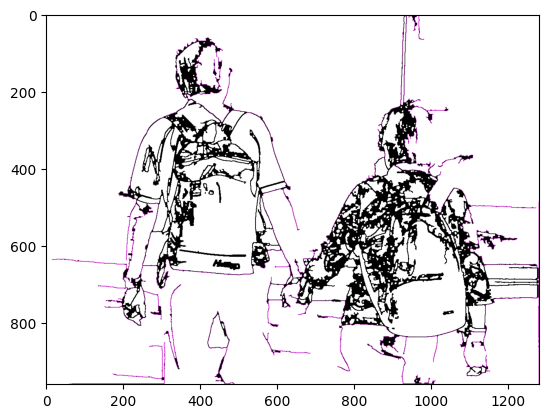

In [14]:
# Stack arrays in the depth sequence (along the third axis).
mask_stack = np.dstack([edges]*3)    # Create 3-channel alpha mask

#-- Blend masked img into MASK_COLOR background --------------------------------------
mask_stack  = mask_stack.astype('float32') / 255.0          # Use float matrices, 
img         = CountersImg.astype('float32') / 255.0                 #  for easy blending

masked = (mask_stack * img) + ((1-mask_stack) * MASK_COLOR) # Blend
masked = (masked * 255).astype('uint8')                     # Convert back to 8-bit 
   
plt.imshow(img)
plt.show()# Displa  
plt.imshow(edges)
plt.show()# Displa
plt.imshow(masked)
plt.show()# Display

### Test backend method

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def get_lines_from_segments(img_path: str):
    image = cv2.imread("pictures/woman.jpg")
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
    # Setting All parameters 
    t_lower = 100  # Lower Threshold
    t_upper = 500  # Upper threshold 
    aperture_size = 5  # Aperture size 
    kernel = np.ones((4,4), np.uint8) 
    MASK_COLOR = (212, 44, 213)  # Set the desired color

    # Applying the Canny Edge filter 
    # with Custom Aperture Size 
    edges = cv2.Canny(image, t_lower, t_upper,  
                    apertureSize=aperture_size) 
    edges = cv2.dilate(edges, kernel)
    edges = cv2.dilate(edges, kernel)
    edges = cv2.erode(edges, kernel)
    
    contours, hierarchy = cv2.findContours(
        edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )

    drawing = np.zeros((gray.shape[0], gray.shape[1], 3), dtype=np.uint8)
    CountersImg = cv2.drawContours(drawing, contours, -1, (212, 44, 213), 1)
    
    # Stack arrays in the depth sequence (along the third axis).
    mask_stack = np.dstack([edges]*3)    # Create 3-channel alpha mask

   # Resize mask_stack to match the shape of CountersImg
    mask_stack_resized = cv2.resize(mask_stack, (CountersImg.shape[1], CountersImg.shape[0]))

    #-- Fill the lines with the desired color --------------------------------------
    masked = np.zeros_like(CountersImg)
    masked[mask_stack_resized != 0] = MASK_COLOR
    
    plt.imshow(image)
    plt.show()


get_lines_from_segments('result_image.png')

ValueError: NumPy boolean array indexing assignment cannot assign 3 input values to the 2195394 output values where the mask is true

In [16]:

import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread('segments_image.png')
gray = cv2.imread('new_img.png')


CANNY_THRESH_1 = 1
CANNY_THRESH_2 = 500
MASK_COLOR=(1.0, 1.0, 1.0)

size = (6, 6)
kernel1 = np.ones((4, 4), np.uint8)
kernel2 = np.ones((3, 3), np.uint8)

# Color Space Conversion Codes
#gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# -- Edge detection -------------------------------------------------------------------
# Edge Detection Algorithm
edges = cv2.Canny(gray, CANNY_THRESH_1, CANNY_THRESH_2)

# Enlarges the area of the object, highlighting features
edges = cv2.dilate(edges, kernel1)

# Erode the boundaries of the foreground object
edges = cv2.erode(edges, kernel2)

# Assignment of pixel values in relation to the provided threshold
_, binary = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)

contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a white background image
white_background = np.ones_like(image) * 255

drawing = np.copy(white_background)
CountersImg = cv2.drawContours(drawing, contours, -1, (212, 44, 213), 2)

plt.imshow(CountersImg)
plt.show()

# Save to disk
cv2.imwrite('picture.png', CountersImg)

# Stack arrays in the depth sequence (along the third axis).
mask_stack = np.dstack([edges] * 3)  # Create 3-channel alpha mask

# -- Blend masked img into MASK_COLOR background --------------------------------------
mask_stack = mask_stack.astype('float32') / 255.0  # Use float matrices for easy blending
img = CountersImg.astype('float32') / 255.0  # for easy blending

masked = (mask_stack * img) + ((1 - mask_stack) * MASK_COLOR)  # Blend
masked = (masked * 255).astype('uint8')  # Convert back to 8-bit

plt.imshow(masked)
plt.show()

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\morph.dispatch.cpp:1022: error: (-215:Assertion failed) !src.empty() in function 'cv::dilate'


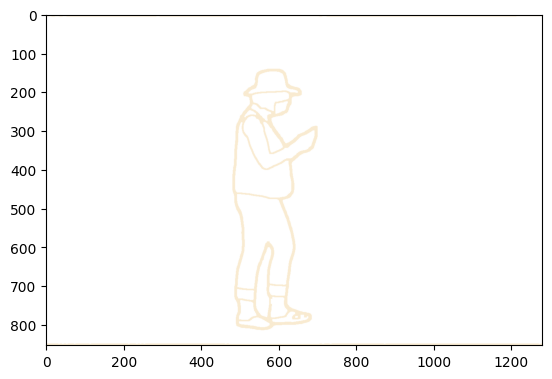

In [ ]:
from PIL import Image
import numpy as np
from collections import Counter

def get_most_common_color(image_path):
    # Bild öffnen
    image = Image.open(image_path)

    # Bild in ein NumPy-Array konvertieren
    image_array = np.array(image)

    # Die Form des Arrays ändern, um die Pixel als Flachliste zu erhalten
    flattened_image_array = image_array.reshape((-1, 3))

    # Zähle die Häufigkeit jeder Farbe
    color_counts = Counter(map(tuple, flattened_image_array))

    # Finde die am häufigsten vorkommende Farbe
    most_common_color = color_counts.most_common(1)[0][0]

    # Konvertiere die am häufigsten vorkommende Farbe in eine Liste von Ganzzahlen
    most_common_color_list = np.array(most_common_color).astype(int).tolist()

    return most_common_color_list

image_path = 'pictures/woman.jpg'
img = cv2.imread('segments_image.png')
gray = cv2.imread('new_img.png')
# Setting All parameters 
t_lower = 100  # Lower Threshold
t_upper = 500  # Upper threshold 
aperture_size = 5  # Aperture size 
kernel = np.ones((4,4), np.uint8) 
MASK_COLOR = (1.0,1.0,1.0)
NEW_LINE_COLOR = get_most_common_color(image_path)  # Set the desired color for lines
NEW_LINE_COLOR_normalized = [val / 255.0 for val in NEW_LINE_COLOR]
    
# Applying the Canny Edge filter 
# with Custom Aperture Size 
edges = cv2.Canny(img, t_lower, t_upper,  
                apertureSize=aperture_size) 
edges = cv2.dilate(edges, kernel)
edges = cv2.dilate(edges, kernel)
edges = cv2.erode(edges, kernel)


# Stack arrays in the depth sequence (along the third axis).
mask_stack = np.dstack([edges]*3)    # Create 3-channel alpha mask

#-- Blend masked img into MASK_COLOR background --------------------------------------
mask_stack  = mask_stack.astype('float32') / 255.0          # Use float matrices, 
img         = img.astype('float32') / 255.0                 #  for easy blending

masked = (mask_stack * NEW_LINE_COLOR_normalized) + ((1-mask_stack) * MASK_COLOR) # Blend
plt.imshow(masked)
plt.show()
#masked = masked * NEW_LINE_COLOR
#masked = (masked * 255).astype('uint8')  


In [ ]:
img = cv2.imread('segments_image.png')
gray = cv2.imread('new_img.png')

# Setting All parameters 
t_lower = 100  # Lower Threshold
t_upper = 500  # Upper threshold 
aperture_size = 5  # Aperture size 
kernel = np.ones((4, 4), np.uint8) 
NEW_LINE_COLOR = (0, 255, 0)  # Set the desired color for lines

# Applying the Canny Edge filter 
# with Custom Aperture Size 
edges = cv2.Canny(img, t_lower, t_upper, apertureSize=aperture_size) 
edges = cv2.dilate(edges, kernel)
edges = cv2.dilate(edges, kernel)
edges = cv2.erode(edges, kernel)

# Stack arrays in the depth sequence (along the third axis).
mask_stack = np.dstack([edges] * 3)  # Create 3-channel alpha mask

#-- Blend masked img into NEW_LINE_COLOR background --------------------------------------
mask_stack = mask_stack.astype('float32') / 255.0  # Use float matrices, 
img = img.astype('float32') / 255.0  # for easy blending

# Replace MASK_COLOR with NEW_LINE_COLOR
masked = (mask_stack * img * NEW_LINE_COLOR) + ((1 - mask_stack) * img)  # Blend
masked = (masked * 255).astype('uint8')

plt.imshow(drawing)
plt.show()
plt.imshow(img)
plt.show()
plt.imshow(masked)
plt.show()

NameError: name 'cv2' is not defined